In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import seaborn as sns           
import matplotlib.pyplot as plt
%matplotlib inline

# warning ignore
import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


## Loading dataset

In [2]:
data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Useful information to understand the table

* Tenure: The customer's number of years in the bank
* Balance: The customer's account balance (amount of money present in a financial repository)
* NumOfProducts: No. of products the customer bought
* HasCrCard: If the user has credit card or not (1 means has a credit card and 0 means doesn't have a credit card)
* Exited: Churned or not ? 0 = No, 1= Yes

## Checking if the dataset is dirty or not

In [3]:
data.isna().sum() #for checking null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
sum(data.duplicated()) #checking if any duplicate values are there are not

0

In [5]:
data.info() #checking about the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Exploratory data analysis

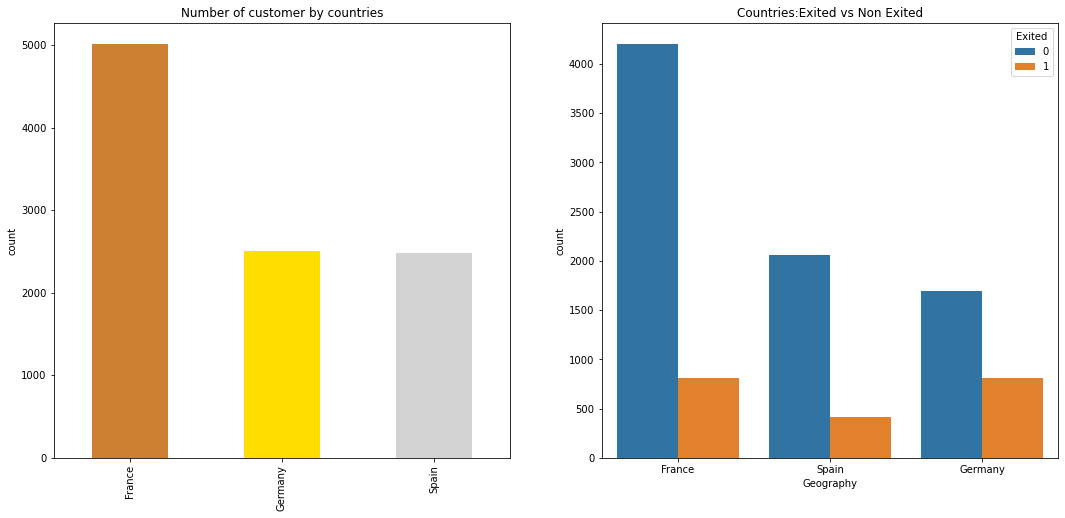

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Geography'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by countries')
ax[0].set_ylabel('count')
sns.countplot(data=data,x='Geography',hue='Exited',ax=ax[1])
ax[1].set_title('Countries:Exited vs Non Exited')
ax[1].set_ylabel('count');

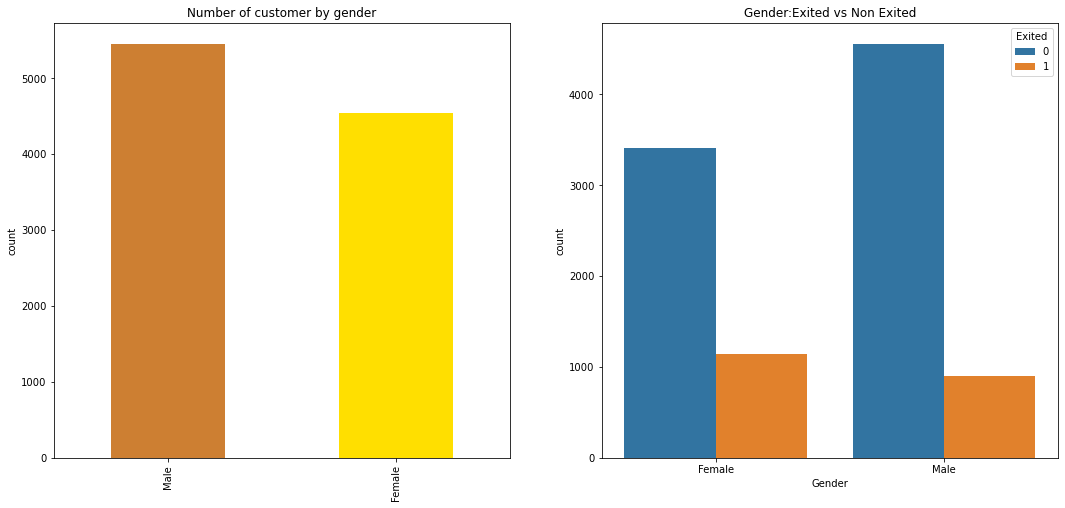

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Gender'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by gender')
ax[0].set_ylabel('count')
sns.countplot(data=data,x='Gender',hue='Exited',ax=ax[1])
ax[1].set_title('Gender:Exited vs Non Exited')
ax[1].set_ylabel('count');

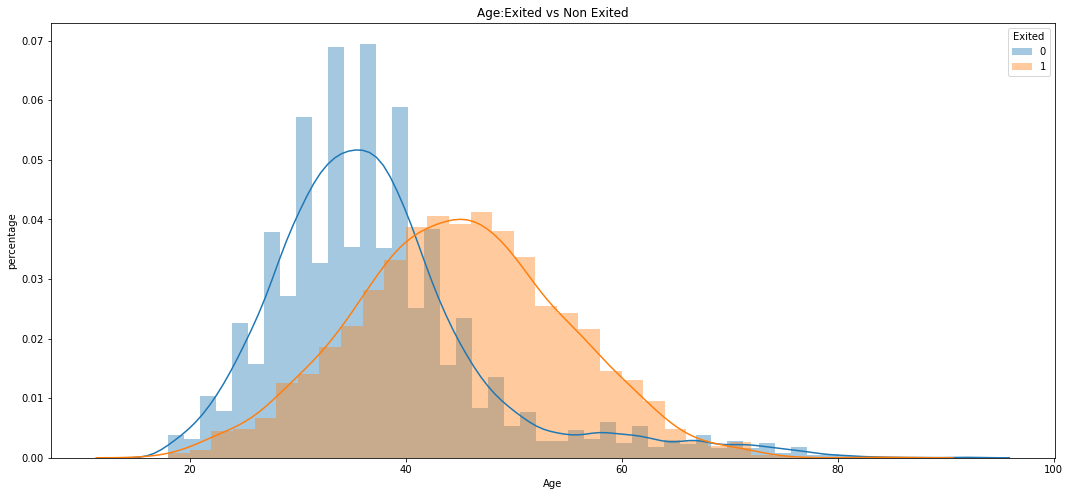

In [8]:
Non_Exited = data[data['Exited']==0]
Exited = data[data['Exited']==1]

plt.subplots(figsize=(18,8))
sns.distplot(Non_Exited['Age'])
sns.distplot(Exited['Age'])
plt.title('Age:Exited vs Non Exited')
plt.legend([0,1],title='Exited')
plt.ylabel('percentage');


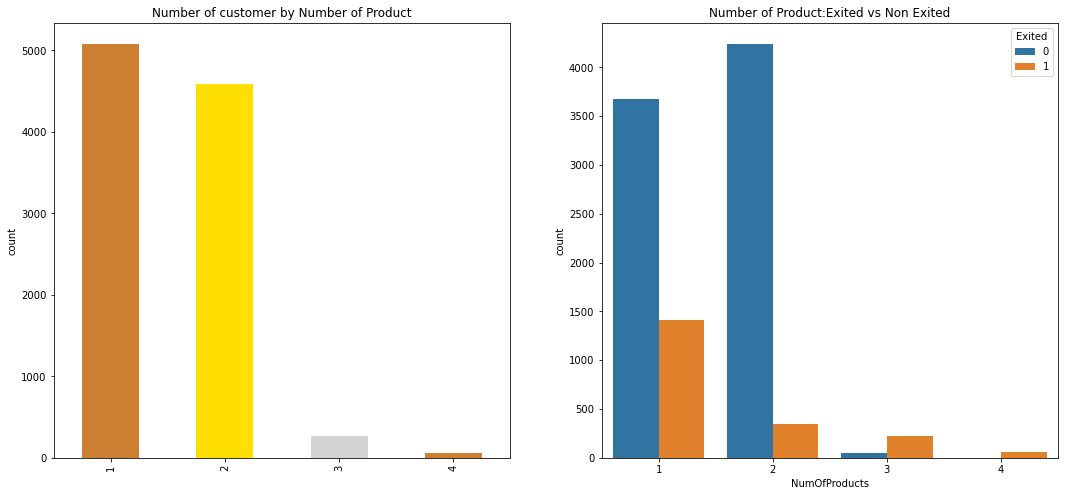

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['NumOfProducts'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by Number of Product')
ax[0].set_ylabel('count')
sns.countplot(data=data,x='NumOfProducts',hue='Exited',ax=ax[1])
ax[1].set_title('Number of Product:Exited vs Non Exited')
ax[1].set_ylabel('count');

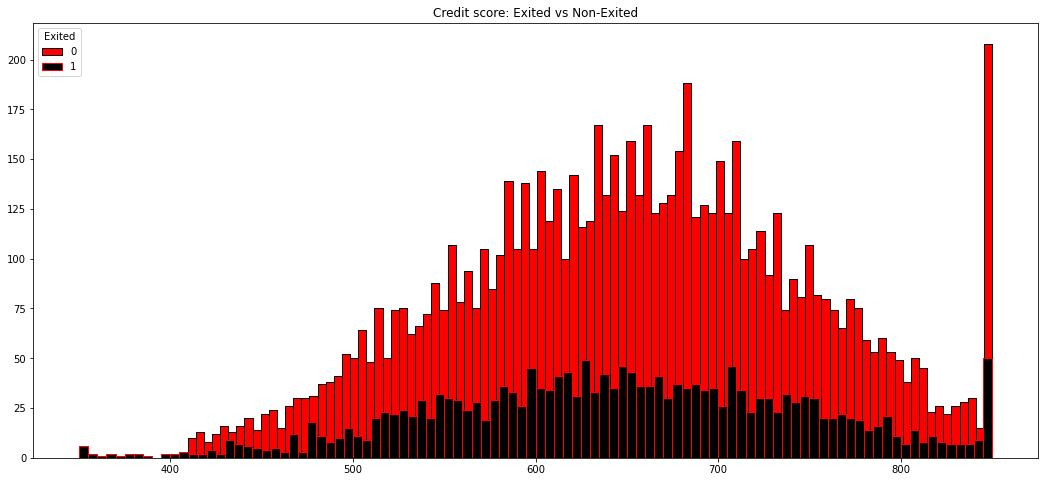

In [10]:
plt.figure(figsize=(18,8))
plt.hist(x='CreditScore',bins=100,data=Non_Exited,edgecolor='black',color='red')
plt.hist(x='CreditScore',bins=100,data=Exited,edgecolor='red',color='black')
plt.title('Credit score: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');

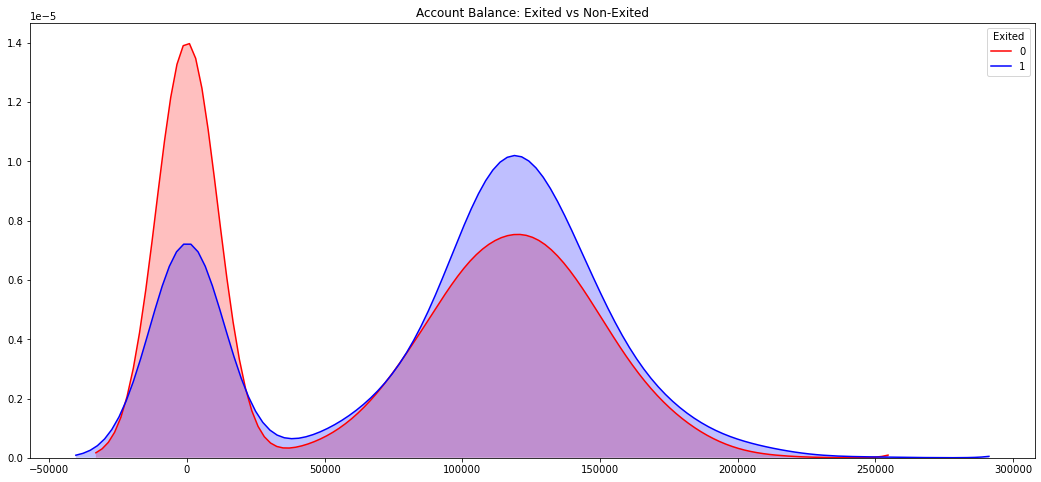

In [11]:
plt.figure(figsize=(18,8))
p1=sns.kdeplot(Non_Exited['Balance'], shade=True, color="r")
p1=sns.kdeplot(Exited['Balance'], shade=True, color="b");
plt.title('Account Balance: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');

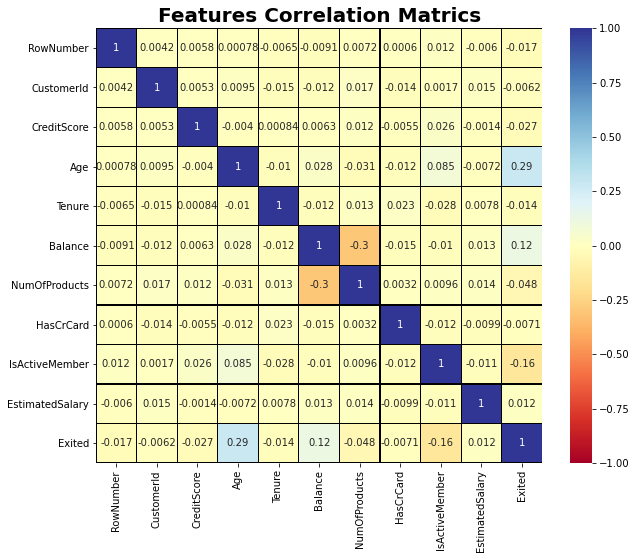

In [12]:
plt.title("features correlation matrics".title(),
          fontsize=20,weight="bold")

sns.heatmap(data.corr(),annot=True,cmap='RdYlBu',linewidths=0.2, vmin=-1, vmax=1,linecolor = 'black') 
fig=plt.gcf()
fig.set_size_inches(10,8);

# Training and testing phase

**Extracting features and labels**

In [13]:
X=data.iloc[:,3:13]    #features
y=data['Exited']     #label

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


**Importing libraries for encoding the categorical columns, for training and testing and for checking accuracy**

In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [16]:
#encoding and labelling the necessary columns
label=LabelEncoder()
scaler = StandardScaler()
X['Geography']=label.fit_transform(X['Geography'])
X['Gender']=label.fit_transform(X['Gender'])
X[['CreditScore','Balance','EstimatedSalary']]=scaler.fit_transform(X[['CreditScore','Balance','EstimatedSalary']])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 100) #training and testing

In [18]:
per=Perceptron()

In [19]:
per.fit(X_train,y_train)

Perceptron()

In [20]:
y_pred_train=per.predict(X_train)
y_pred_test=per.predict(X_test)

In [21]:
print("Training Accuracy: ",accuracy_score(y_pred_train,y_train))
print("Testing Accuracy: ",accuracy_score(y_pred_test,y_test))

Training Accuracy:  0.796875
Testing Accuracy:  0.794


**So without the gridsearch technique, we got an accuracy of 79%**

*Now we will use GridSearch technique*

In [22]:
param_grid={'eta0': [1.0,0.5,1e-10], 'max_iter': [5,10,20,30,40,50]}

In [23]:
grid=GridSearchCV(per, param_grid, cv=100)

In [24]:
grid.fit(X_train,y_train)

GridSearchCV(cv=100, estimator=Perceptron(),
             param_grid={'eta0': [1.0, 0.5, 1e-10],
                         'max_iter': [5, 10, 20, 30, 40, 50]})

In [25]:
grid.best_score_

0.796875

In [26]:
grid.best_params_

{'eta0': 1e-10, 'max_iter': 10}

In [27]:
perceptron=grid.best_estimator_
y_pred_train=perceptron.predict(X_train)
y_pred_test=perceptron.predict(X_test)
print("Training Accuracy: ",accuracy_score(y_pred_train,y_train))
print("Testing Accuracy: ",accuracy_score(y_pred_test,y_test))

Training Accuracy:  0.804875
Testing Accuracy:  0.802


**With GridSearch technique we got a slightly better training and testing accurcay and that is 80%**